Duplicate key in file WindowsPath('C:/Users/tauyu/anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')


<IPython.core.display.Javascript object>


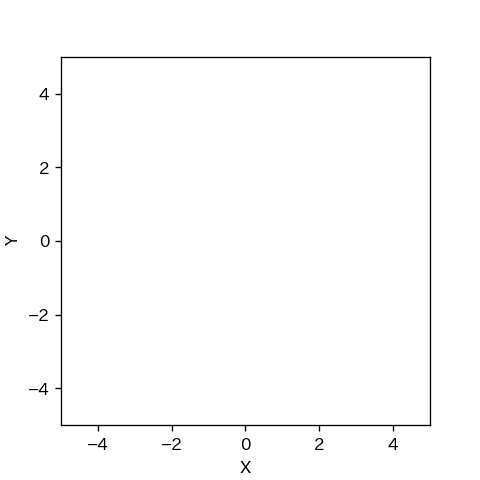

In [1]:
import sys
sys.path.append('../scripts/')
from mcl import*

In [2]:
class ResetMcl(Mcl): ###resetmcl3 （12行目以下）
    def __init__(self, envmap, init_pose, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}, \
                 distance_dev_rate=0.14, direction_dev=0.05, alpha_threshold=0.001): #alpha_thresholdを追加
        super().__init__(envmap, init_pose, num, motion_noise_stds, distance_dev_rate, direction_dev)
        self.alpha_threshold = alpha_threshold #追加
        
    def random_reset(self):
         for p in self.particles:
                p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
                p.weight = 1/len(self.particles)
                
    def sensor_resetting_draw(self, particle, landmark_pos, ell_obs, phi_obs): #追加
            ##パーティクルの位置を決める##
            psi = np.random.uniform(-np.pi, np.pi) #ランドマークからの方角を選ぶ
            ell = norm(loc=ell_obs, scale=(ell_obs*self.distance_dev_rate)**2).rvs() #ランドマークからの距離を選ぶ
            particle.pose[0] = landmark_pos[0] + ell*math.cos(psi)
            particle.pose[1] = landmark_pos[1] + ell*math.sin(psi)
            
            ##パーティクルの向きを決める##
            phi = norm(loc=phi_obs, scale=(self.direction_dev)**2).rvs() #ランドマークが見える向きを決める
            particle.pose[2] = math.atan2(landmark_pos[1]- particle.pose[1], landmark_pos[0]- particle.pose[0]) - phi
            
            particle.weight = 1.0/len(self.particles) #重みを1/Nに
            
    def sensor_resetting(self, observation): #追加
        if len(observation)==2:
            nearest_obs = np.argmin([obs[0][0] for obs in observation]) #距離が一番近いランドマークを選択
            values, landmark_id = observation[nearest_obs]
            
            
        for p in self.particles:
            self.sensor_resetting_draw(p, self.map.landmarks[landmark_id].pos, *values)
        
    def observation_update(self, observation):        
        for p in self.particles:
            p.observation_update(observation, self.map, self.distance_dev_rate, self.direction_dev) 
            
        self.set_ml()

        if sum([p.weight for p in self.particles]) < self.alpha_threshold: 
            self.sensor_resetting(observation) #sensor_resettingに変更
        else:
            self.resampling() 

In [3]:
class ResetMcl(Mcl): ###resetmcl3 （12行目以下）
    def __init__(self, envmap, init_pose, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}, \
                 distance_dev_rate=0.14, direction_dev=0.05, alpha_threshold=0.001): #alpha_thresholdを追加
        super().__init__(envmap, init_pose, num, motion_noise_stds, distance_dev_rate, direction_dev)
        self.alpha_threshold = alpha_threshold #追加
        
        
    def random_reset(self):
         for p in self.particles:
                p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
                p.weight = 1/len(self.particles)
                
    def sensor_resetting_draw(self, particle, landmark_pos, ell_obs, phi_obs): #追加
            ##パーティクルの位置を決める##
            psi = np.random.uniform(-np.pi, np.pi) #ランドマークからの方角を選ぶ
            ell = norm(loc=ell_obs, scale=(ell_obs*self.distance_dev_rate)**2).rvs() #ランドマークからの距離を選ぶ
            particle.pose[0] = landmark_pos[0] + ell*math.cos(psi)
            particle.pose[1] = landmark_pos[1] + ell*math.sin(psi)
            
            ##パーティクルの向きを決める##
            phi = norm(loc=phi_obs, scale=(self.direction_dev)**2).rvs() #ランドマークが見える向きを決める
            particle.pose[2] = math.atan2(landmark_pos[1]- particle.pose[1], landmark_pos[0]- particle.pose[0]) - phi
            
            particle.weight = 1.0/len(self.particles) #重みを1/Nに
            
    def sensor_resetting(self, observation): 
        d=list([obs[0][0] for obs in observation])
        if len(d)>=2:
            nearest_obs=np.argmin([obs[0][0] for obs in observation]) #最小値の位置=最小値の位置を求める関数(idを含むセンサ値のリスト)
            values1, landmark_id1=observation[nearest_obs]
            a = [obs[0][0] for obs in observation] #単なるセンサ値のリスト
            b = sorted(d).index(sorted(d)[1]) #ただのセンサ値
            values2, landmark_id2 = observation[b] #bの型がおかしい可能性がある b(センサ値)の場所をobservation[]のかっこに入れる
            values=(values1+values2)/2
            c=(self.map.landmarks[landmark_id1].pos+self.map.landmarks[landmark_id2].pos)/2
            for p in self.particles:
                self.sensor_resetting_draw(p, c, *values)
                
            print(d)

            
        elif len(d)==1:
            nearest_obs3=np.argmin([obs[0][0] for obs in observation])
            values3, landmark_id3=observation[nearest_obs3]
            
            for p in self.particles:
                self.sensor_resetting_draw(p, self.map.landmarks[landmark_id3].pos, *values3)
                
            print(d)
                
    def observation_update(self, observation):        
        for p in self.particles:
            p.observation_update(observation, self.map, self.distance_dev_rate, self.direction_dev) 
            
        self.set_ml()

        if sum([p.weight for p in self.particles]) < self.alpha_threshold:
            self.sensor_resetting(observation) 
        else:
            self.resampling()

C:\Users\tauyu\anaconda\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [4]:
def trial(animation):
    time_interval=0.1
    world=World(30,time_interval,debug=not animation)
    
    ##地図を生成して3つランドマークを追加##
    m=Map()
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)
    
    ##ロボットを作る##
    init_pose=np.array([np.random.uniform(-5.0,5.0),np.random.uniform(-5.0,5.0),np.random.uniform(-math.pi,math.pi)]).T
    robot_pose=np.array([np.random.uniform(-5.0,5.0),np.random.uniform(-5.0,5.0),np.random.uniform(-math.pi,math.pi)]).T
    pf=ResetMcl(m,init_pose,100)
    a=EstimationAgent(time_interval,0.2,10.0/180*math.pi,pf)
    r=Robot(robot_pose,sensor=Camera(m),agent=a,color="red")
    world.append(r)
    
    world.draw()
    return(r.pose,pf.ml.pose)

<IPython.core.display.Javascript object>


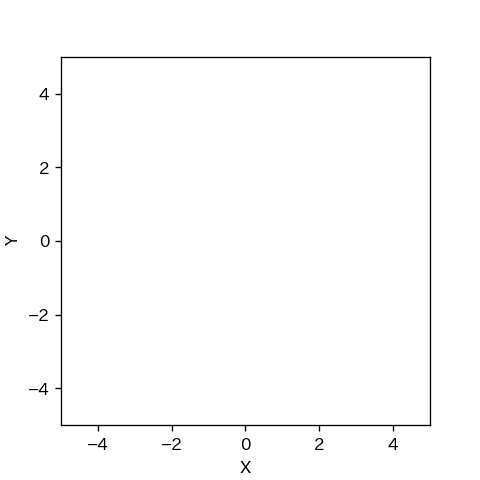

(array([-3.92576203, -2.64779556,  1.60960643]),
 array([ 2.70475921,  3.58248314, -0.76764424]))

In [5]:
trial(True)

In [6]:
if __name__ =='__main__':
    ok=0
    for i in range(1000):
        actual, estm=trial(False)
        diff=math.sqrt((actual[0]-estm[0])**2+(actual[1]-estm[1])**2)
        print(i,"真値:",actual,"推定値:",estm,"誤差:",diff)
        if diff<=1.0:
            ok+=1
            
    ok

[4.633467308503321]
0 真値: [ 4.82193177 -3.10268161  2.75512079] 推定値: [ 4.9603027  -4.59495628  2.33999986] 誤差: 1.4986761528344503
[1.747274677704322]
1 真値: [-5.06398886  2.11692734  5.61501793] 推定値: [-3.9427287   1.05244017  1.0352753 ] 誤差: 1.5460780352163468
[7.089344516595709]
2 真値: [-3.8559778   2.7042122   6.14160178] 推定値: [-3.80797524  2.68021077  5.9466019 ] 誤差: 0.05366855886526534
[7.025344125896231]
[4.554319704784786, 5.128580059752715]
[4.796737330369058, 5.378818320214505]
[4.518654278804648, 4.667397287015672]
[4.1361564552263514, 5.714531638648962]
[4.61455288949805, 5.1137691431722025]
[4.01211616652702, 5.074653194938893]
[3.5995186378631376, 5.7162604688183904]
[4.465150034041447, 4.693065046261753]
[3.9031710075309545, 4.795552712781835]
[4.398895397429638, 5.252238071342705]
[3.938860588887942, 5.109061665214686]
[4.442765390070693, 4.948646049961013]
[3.339727745792143]
3 真値: [2.80896056 1.13456508 7.52678212] 推定値: [4.68900566 3.15277059 2.99487413] 誤差: 2.75821011807

C:\Users\tauyu\section_advanced_localization\../scripts\ideal_robot.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4,4))


[6.117636098547597]
20 真値: [1.04361266 4.32144698 6.17193785] 推定値: [ 0.69219008  4.32086979 -0.02364475] 誤差: 0.3514230590544422
[4.404911428797976]
[3.3490897687287764]
21 真値: [ 4.25598817 -1.2171944   7.38936881] 推定値: [ 2.943347   -1.04625211  0.78304435] 誤差: 1.323725090006447
[1.838786856586547]
22 真値: [ 5.08295118 -4.53451247  8.03550169] 推定値: [ 5.36746699 -4.35786381  8.12572017] 誤差: 0.3348940025810309
[0.8135846747720625]
23 真値: [-4.89879614  0.60165118  6.08902336] 推定値: [-2.00259954  1.06125894  8.1070121 ] 誤差: 2.9324382358821186
[5.9751018682718]
[4.577241391215419, 5.521716171202813]
[4.337860192233914]
24 真値: [-5.12174493 -1.11838771  4.9470666 ] 推定値: [-7.20797812 -0.34726947  4.54223545] 誤差: 2.22418350576939
[6.739726319922651]
[5.756339692011883, 5.937852024481884]
25 真値: [3.12429626 0.88158971 7.64430903] 推定値: [2.61787714 0.8231972  1.08815909] 誤差: 0.5097744699575053
[1.7142183204100823]
26 真値: [-3.79653911  1.52915801  6.16292667] 推定値: [-4.32838662  2.35274794  3.64014807]